TESTE:
# Título Grande
## Subtítulo
**Negrito** e *itálico*  
- Lista de itens
- Outro item
1. Lista numerada
2. Segundo item
[Link para o Google](https://www.google.com)

# Análise Exploratória dos Dados (EDA)

Inicialmente, foi realizada a leitura do dataset para iniciar a análise dos dados e examinar o conjunto de variáveis disponíveis.

O dataset contém diversas informações relevantes, como o preço por noite do aluguel, o tipo de espaço, a localização, a disponibilidade anual do quarto, o número mínimo de noites para reserva e a quantidade de avaliações. Esses dados são fundamentais para auxiliar o cliente na escolha do local ideal.

Além disso, o dataset também inclui informações relacionadas à identificação do anúncio na plataforma e sobre o Host, como os IDs, o nome do Host e o título do anúncio. Esses detalhes podem ser úteis para entender melhor a origem dos dados e a relação entre os anúncios e seus respectivos hosts.

In [84]:
# Bibliotecas
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import geodatasets as gds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [100]:
# Leitura do DataSet & Dicionario de informações
help = {'id': 'Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo',
        'nome': 'Representa o nome do anúncio',
        'host_id': 'Representa o id do usuário que hospedou o anúncio',
        'host_name': 'Contém o nome do usuário que hospedou o anúncio',
        'bairro_group': 'Contém o nome do bairro onde o anúncio está localizado',
        'bairro': 'Contém o nome da área onde o anúncio está localizado',
        'latitude': 'Contém a latitude do local',
        'longitude': 'Contém a longitude do local',
        'room_type': 'Contém o tipo de espaço de cada anúncio',
        'price': 'Contém o preço por noite em dólares listado pelo anfitrião',
        'minimo_noites':'Contém o número mínimo de noites que o usuário deve reservar',
        'numero_de_reviews': 'Contém o número de comentários dados a cada listagem',
        'ultima_review': 'Contém a data da última revisão dada à listagem',
        'reviews_por_mes': 'Contém o número de avaliações fornecidas por mês',
        'calculado_host_listings_count': 'Contém a quantidade de listagem por host',
        'disponibilidade_365': 'Contém o número de dias em que o anúncio está disponível para reserva'}

df = pd.read_csv('teste_indicium_precificacao.csv')
df.head(20)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


---
A análise do resumo estatístico obtido via describe() revela a presença de aluguéis com preço igual a 0, bem como outliers com valores superiores a 10.000 dólares por noite.

Além disso, algumas acomodações exigem um número mínimo de noites muito superior ao percentil de 75% (5 noites), chegando a 1.250 noites no máximo.

O primeiro caso pode estar associado a acomodações altamente luxuosas, enquanto o segundo pode indicar que o anfitrião busca minimizar a rotatividade de hóspedes.

Esses outliers podem distorcer as análises e comprometer o desempenho do modelo, tornando sua remoção uma possível etapa importante no pré-processamento dos dados.

In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.090928,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.597294,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


---
Algumas colunas possuem valores faltantes, como as colunas "ultima review" e "reviews_por_mes", que de acordo com df.head() e o df.info(), estão preenchidos com dados NaN.

Para esses valores ausentes, com a intenção de impedir possiveis erros de código durante a análise, foi definido a seguinte estrutura de substituição:


Nas colunas...
- "nome": NaN será substituido pela a palavra "For rent"
- "host_name": NaN será preenchido por "Unknown"
- "ultima_review": NaN por 0 
- "reviews_por_mes": NaN por 0 --> Estamos assumindo que o espaço nunca recebeu reviews

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [11]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [102]:
df['nome'] = df['nome'].fillna("For rent")
df['host_name'] = df['host_name'].fillna("Unknown")
df['ultima_review'] = df['ultima_review'].fillna(0)
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [60]:
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [10]:
print('N° de Bairros:', len(df.bairro_group.unique()), 
    '\nN° de lugares:', len(df.bairro.unique()),
    '\nN° de host:', len(df.host_name.unique()))

N° de Bairros: 5 
N° de lugares: 221 
N° de host: 11453


## Hipóteses de négocio
***

A partir das informações fornecidas pelo dataset, com o objetivo de desenvolver um modelo para predição do preço de um aluguel, buscamos relacionar as variaveis que melhor impactam o valor de um aluguel. 

Portanto, é esperado que algumas hipóteses sejam formuladas, tais como:

1. O tipo do espaço deve impactar fortemente o preço: 
- É esperado que os "Entire home/apt" (Apartamentos/casas inteiro) stenham preços mais altos do que os demais
- Private room ("Quartos privados") tenham preços intermediários
- Shared room ("Quartos compartilhados") sejam os mais baratos

2. A localização (Bairros) também deve influenciar os preços (Lógica da oferta e demanda):
- Regiões centrais ou turísticas devem ter preços, em média, mais elevados
- Regiões mais afastadas dos centros devem ter preços mais baixos

3. A avaliação do espaço também pode indicar maiores demandas (Lógica da oferta e demanda):
- Anuncios com muitos reviews pode significar alta procura e consequentemente ter preços competitivos
- Anuncios com poucas avaliações pode indicar espaços novos ou poucos atrativos

4. Alta disponibilidade anual pode diminuir os valores dos preços (Lógica da oferta e demanda)
- Espaços muito disponíveis tendem a ter preços mais baixos devido à necessidade de manter a ocupação alta.
- Espaços pouco disponiveis podem ter preços mais elevados, uma vez que são mais raros a disponibilidade.

5. Mínimo de noites mais baixos (como minimo_noites = 1) podem ter preços mais baixos, pois podem ser locais com foco em atender turistas de curta duração. Em contrapartida, mínimo de noites mais altos pode indicar preços mais altos pois o host busca estadias mais longas e menos trocas de hóspedes

---
### Hipótese 1: O tipo do espaço deve impactar fortemente o preço: 

É esperado que o preço médio por noite siga a ordem:


Entire home/apt > Private room > Shared room


Para avaliar essa hipótese, foi elaborado um boxplot do preço por tipo de espaço (Figura 1). Como esperado, a análise visual do gráfico à direita confirma essa hierarquia, uma vez que a mediana, o terceiro quartil e o limite superior são maiores para "Entire home/apt", seguidos por "Private room" e, por último, "Shared room".


No gráfico à esquerda, observa-se que os outliers seguem esse mesmo padrão, com valores significativamente mais altos para "Entire home/apt". No entanto, como esses valores extremos representam, em geral, menos de 5% dos dados, seu impacto pode ser desconsiderado na análise principal.

Text(0.5, 0.98, 'Figura 1: Preço por noite em função do tipo de espaço')

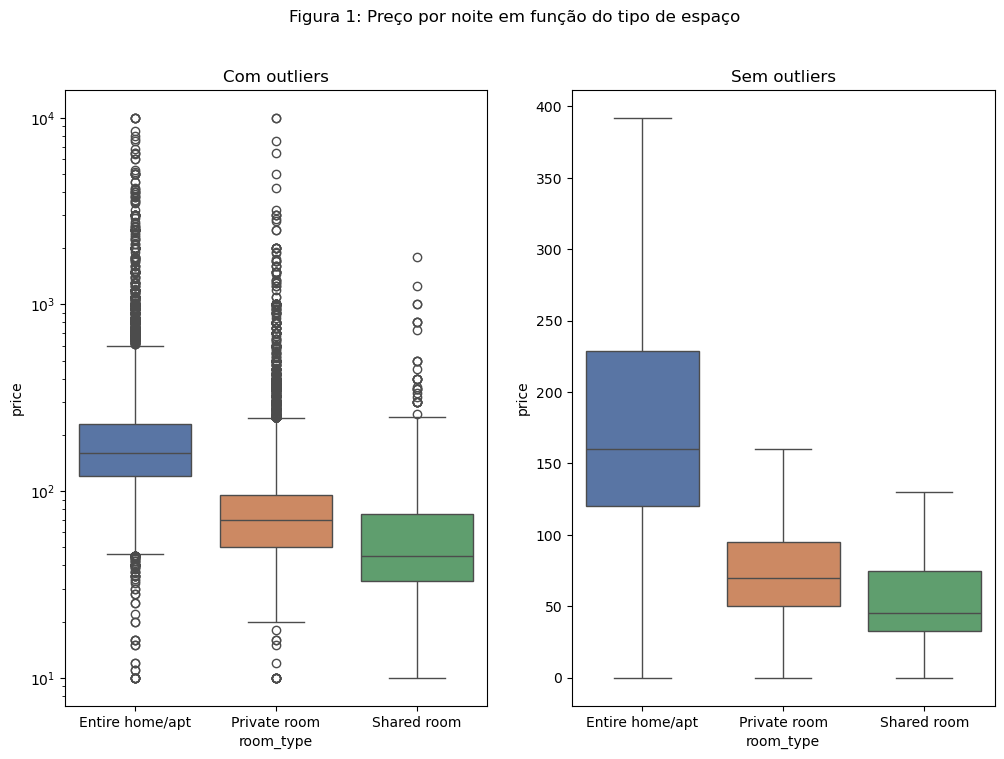

In [104]:
# Boxplot Preço x Tipo de espaço
fig, ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].set_title('Com outliers')
ax[0].set_yscale('log')
ax[1].set_title('Sem outliers')
sn.boxplot(data=df, x='room_type', y='price', ax=ax[0], palette='deep')
sn.boxplot(data=df, x='room_type', y='price', ax=ax[1], showfliers=False, palette='deep')
fig.suptitle('Figura 1: Preço por noite em função do tipo de espaço')


---
### Hipótese 2: A localização (Bairros) deve influenciar os preços (Lógica da oferta e demanda)

É esperado que:

- Regiões centrais ou turísticas (como Manhattan) tenham preços, em média, mais elevados
- Regiões mais afastadas dos centros (como Bronx e Staten Island) tenham preços mais baixos

Para avaliar essa hipótese, foi realizado o plot de um Heatmap de localização dos imóveis no estado de Nova Iorque pelo preço (Figura 2) e a distribuição de preços por bairro por meio de boxplots (Figura 3)


In [92]:
# Descartando os outliers
df_ = df[df['price'] < df['price'].quantile(0.95)]

# Centroids de cada bairro para adicionar o nome dos bairros no mapa
bairro_ny = pd.DataFrame({
    'latitude': [40.776, 40.650, 40.742, 40.579, 40.837], 
    'longitude': [-73.971, -73.949, -73.769, -74.152, -73.865],
    'city': ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
})

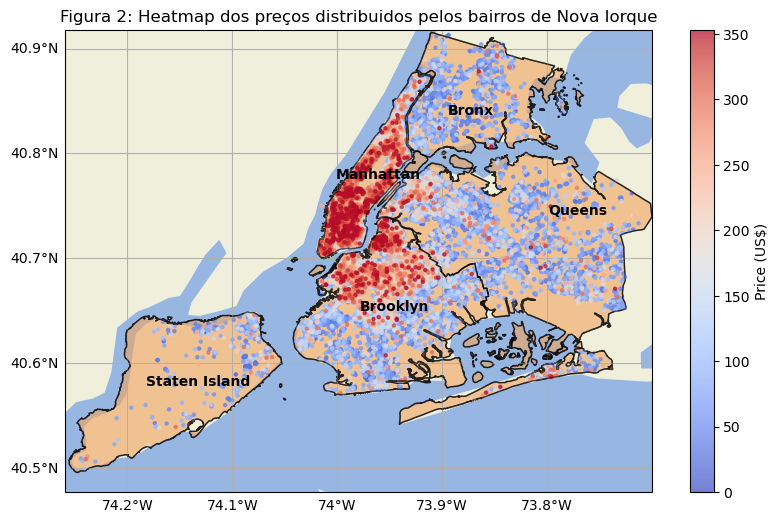

In [164]:
# Obtendo o shapefile do Estado de Nova Iorque usando Geopandas e o Geodatasets
gny = gpd.read_file(gds.get_path("nybb"))

# Iniciando a figura com projeção do Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Definindo limites da área de Nova York
ax.set_extent([-74.2591, -73.7004, 40.4774, 40.9176], crs=ccrs.PlateCarree())
ax.set_title('Figura 2: Heatmap dos preços distribuidos pelos bairros de Nova Iorque')

# Ordenando o dataframe pela coluna de preços para evidenciar melhor as regiões de altos preços no Heatmap 
df_ = df_.sort_values(by='price')

# Heatmap
sc = ax.scatter(df_['longitude'], df_['latitude'], c=df_['price'], cmap='coolwarm', alpha=0.7, s=5,zorder=10, transform=ccrs.PlateCarree())

# Adicionando o nome dos bairros
for i in range(len(bairro_ny)):
    ax.text(bairro_ny['longitude'][i]-0.03,
            bairro_ny['latitude'][i],
            bairro_ny['city'][i], 
            fontsize=10, fontweight='bold',
            ha='left',
            transform=ccrs.PlateCarree(), zorder=30)

gny.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='sandybrown', zorder=1, lw=1)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
gny.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='None', zorder=20) # Coloquei novamente para reforçar as linhas divisórias do mapa

plt.colorbar(sc, ax=ax, label="Price (US$)")
ax.gridlines(draw_labels={"bottom": "x", "left": "y"})


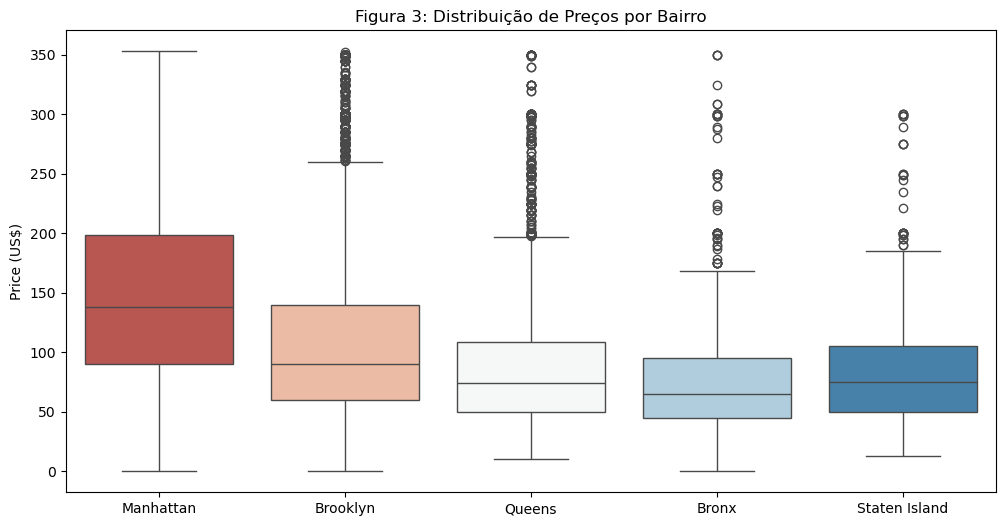

In [142]:
plt.figure(figsize=(12, 6))
sn.boxplot(data=df_.sort_values(by='price', ascending=False), x='bairro_group', y='price', palette='RdBu')
plt.title("Figura 3: Distribuição de Preços por Bairro")
plt.xlabel("")
plt.ylabel("Price (US$)")
plt.show()


---
### Hipótese 3: A avaliação do Imóvel pode indicar maiores demandas (Lógica da oferta e demanda)

É esperado que:
- Anuncios com muitos reviews pode significar alta procura e consequentemente ter preços competitivos
- Anuncios com poucas avaliações pode indicar espaços novos ou poucos atrativos

Para avaliar essa hipótese, foi analisada a relação entre o número de avaliações (reviews) e o preço do espaço (Figura 4). Como esperado, observou-se que imóveis com poucas avaliações apresentam uma grande variabilidade nos preços. Por outro lado, à medida que o número de avaliações aumenta, os preços tendem a diminuir, evidenciando um comportamento competitivo no mercado, onde hosts buscam estabelecer valores mais atraentes para conquistar clientes. Essa tendência sugere que imóveis com maior histórico de avaliações podem estar mais alinhados às expectativas de preço dos consumidores.

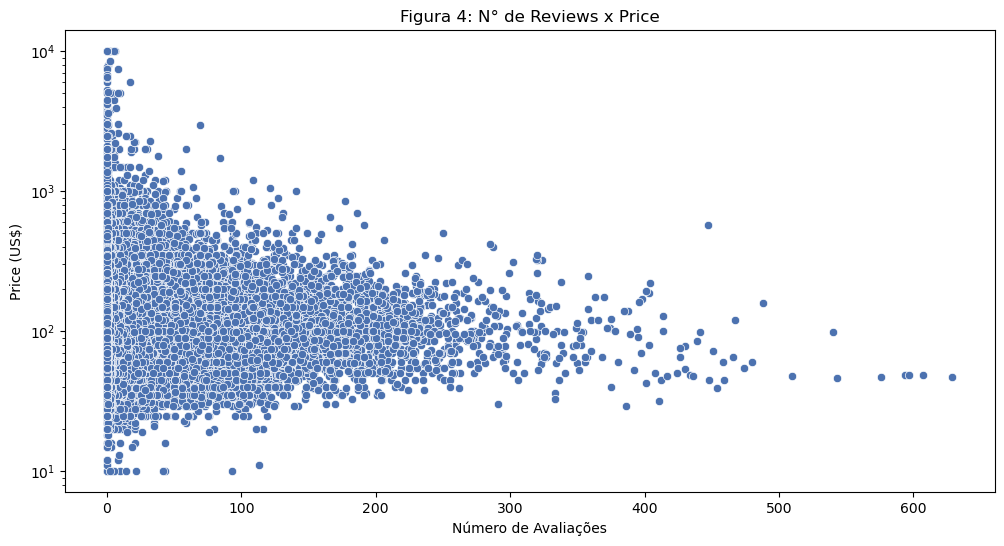

In [216]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='numero_de_reviews', y='price', alpha=1)
plt.title("Figura 4: N° de Reviews x Price")
plt.xlabel("Número de Avaliações")
plt.ylabel("Price (US$)")
plt.yscale("log")


---
### Hipótese 4: Alta disponibilidade anual pode diminuir os valores dos preços (Lógica da oferta e demanda)

É esperado que:
- Espaços com alta disponibilidade ao longo do ano tendam a ter preços mais baixos, pois os hosts buscam manter uma alta taxa de ocupação, muitas vezes reduzindo os valores para atrair mais reservas.
  
- Espaços com pouca disponibilidade podem apresentar preços mais elevados, uma vez que são mais exclusivos, e consequentemente mais valorizados no mercado.

Essa dinâmica reflete a relação entre oferta e demanda, onde a escassez de disponibilidade pode justificar preços mais altos.

Para avaliar essa hipótese, foi analisada a dispersão entre a variável disponibilidade_365 e o preço (price), com o objetivo de observar a relação entre ambas (Figura 5). A análise do gráfico de dispersão permite verificar se há uma tendência de redução nos preços à medida que a disponibilidade anual aumenta, corroborando a hipótese de que hosts ajustam os valores para maximizar a ocupação de seus imóveis. Por outro lado, a Figura 5 apresenta uma grande variabilidade em toda a escala de disponibilidade anual, indicando que deve haver alguns hosts que mesmo com alta disponibilidade, mantêm preços mais altos devido a fatores como localização privilegiada, comodidades exclusivas ou reputação do anúncio.

Com isso em mente, a análise foi segmentada por tipo de imóvel e por localização (Figuras 6 e 7, respectivamente). No entanto, mesmo com essa segmentação, não foi observada uma relação clara entre a disponibilidade e o preço. Em todos os casos, os preços apresentam uma grande variabilidade em toda a escala da variável disponibilidade_365, independentemente do tipo de imóvel ou da localização. Isso indica que a disponibilidade anual, por si só, não é um fator determinante para a precificação.

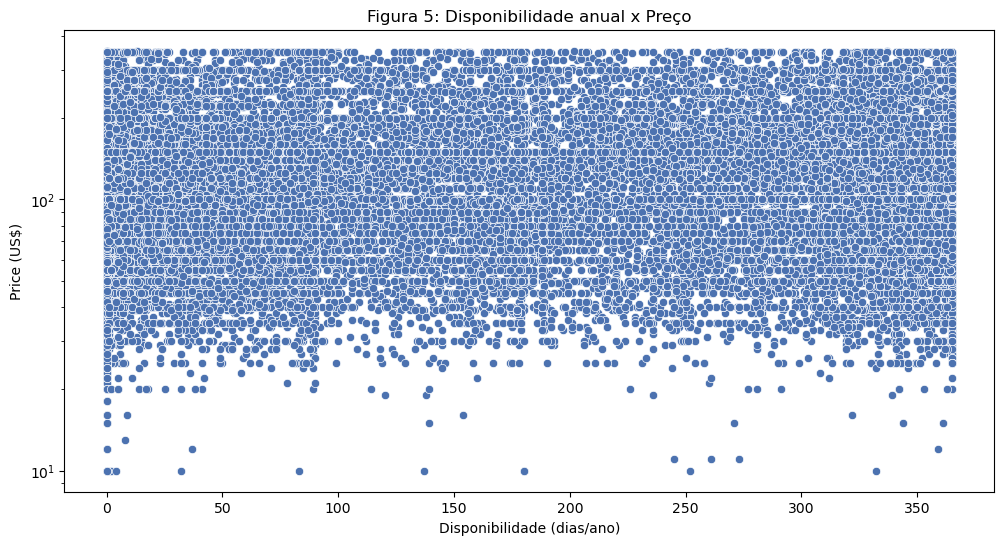

In [323]:
df1 = df[df['price'] < df['price'].quantile(0.95)]
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df1, x='disponibilidade_365', y='price', alpha=1)
plt.title("Figura 5: Disponibilidade anual x Preço")
plt.xlabel("Disponibilidade (dias/ano)")
plt.ylabel("Price (US$)")
plt.yscale("log")

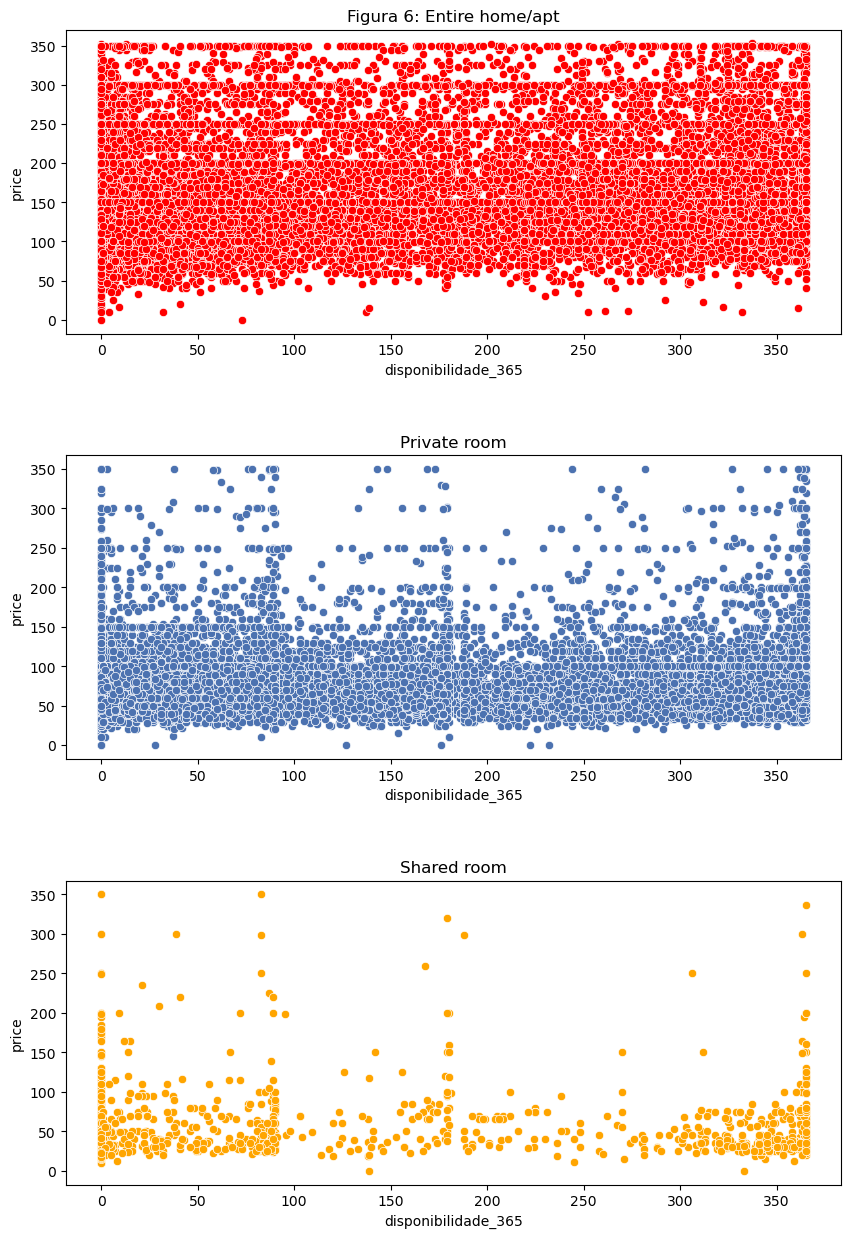

In [329]:
fig, ax = plt.subplots(nrows=3, figsize = (10,15))

sn.scatterplot(ax=ax[0], color='red',
               data=df1[df1['room_type']=='Entire home/apt'],
               x='disponibilidade_365', y='price', alpha=1)
ax[0].set_title('Figura 6: Entire home/apt')

sn.scatterplot(ax=ax[1],
               data=df1[df1['room_type']=='Private room'],
               x='disponibilidade_365', y='price', alpha=1)
ax[1].set_title('Private room')

sn.scatterplot(ax=ax[2], color='orange',
               data=df1[df1['room_type']=='Shared room'],
               x='disponibilidade_365', y='price', alpha=1)
ax[2].set_title('Shared room')

plt.subplots_adjust(hspace=0.4)

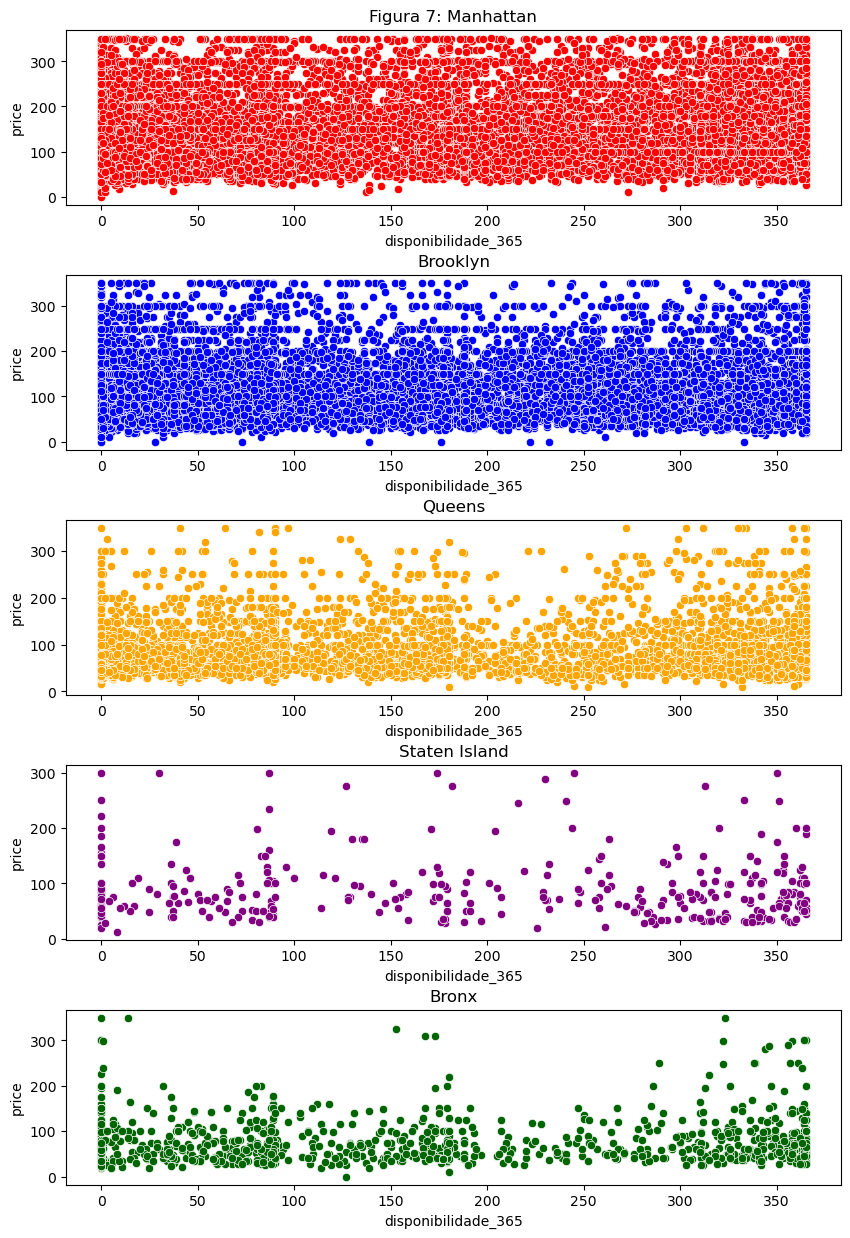

In [327]:
fig, ax = plt.subplots(nrows=5, figsize = (10,15))

cities = list(bairro_ny.city)
color = ['red', 'blue', 'orange', 'purple', 'darkgreen']

for i in range(len(cities)):
    sn.scatterplot(ax=ax[i], color=color[i],
               data=df1[df1['bairro_group']==cities[i]],
               x='disponibilidade_365', y='price', alpha=1)
    if i ==0:
        ax[i].set_title('Figura 7: Manhattan')
    else:
        ax[i].set_title(f'{cities[i]}')

plt.subplots_adjust(hspace=0.4)

---
### Hipótese 5: Mínimo de noites x Preço

É esperado que:

- Mínimos de noites mais baixos (como minimo_noites = 1) possam estar associados a preços mais baixos, pois esses imóveis tendem a atender turistas em estadias curtas, com foco em maior rotatividade e ocupação.

- 
Mínimos de noites mais altos podem estar relacionados a preços mais elevados, uma vez que exigem um compromisso maior do hóspede e podem atrair um público disposto a pagar mais por estadias prolongadas


É possível que os preços aumentem conforme o número mínimo de noites exigido cresce, mas com uma possível estabilização para estadias muito longas, onde a relação entre preço e duração da estadia pode se tornar menos linearo.

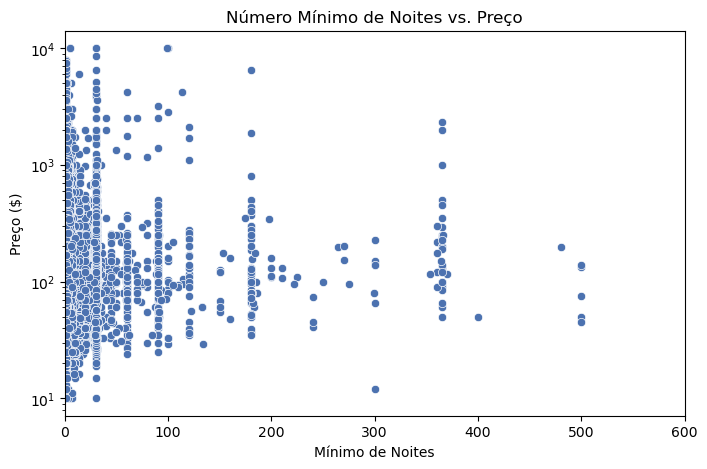

In [434]:
df1 = df[df['price'] < df['price'].quantile(0.95)]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='minimo_noites', y='price', alpha=1)
plt.title("Número Mínimo de Noites vs. Preço")
plt.xlabel("Mínimo de Noites")
plt.ylabel("Preço ($)")
plt.yscale("log")
plt.xlim(0, 600)  # Limita a visualização até 30 noites
plt.show()


In [410]:
df1.bairro_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [352]:
df.sort_values(by='price', ascending=False).head(50)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
29237,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0,0.00,1,83
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0,0.00,1,365
6529,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
4376,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
29661,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0,0.00,12,146
45665,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179
